##### PROBLEM STATEMENT
* Suppose you work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer will retire or not based on his/her features.
  - Features are his/her age
  - and net savings (retirement savings in the U.S.).
  -  Here Retire is your dependentvariable
  -  and Age and
  -  Savings will be your independent variables.
  -   You thought that applying a machine learning algorithm like Support Vector Machine (SVC) can be of great help to solve the problem.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
###load the data:
dataset=pd.read_csv('Bank_Customer_retirement.csv')


In [4]:
dataset.head()

,Customer ID,Age,Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [5]:
dataset.drop('Customer ID',axis=1,inplace=True)

In [6]:
dataset.columns

Index(['Age', 'Savings', 'Retire'], dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      500 non-null    float64
 1   Savings  500 non-null    float64
 2   Retire   500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [8]:
dup = dataset[dataset.duplicated()]

In [9]:
dup

,Age,Savings,Retire


In [10]:
# in case of duplicate entries we will use below to drop them from the data set
#dataset = dataset.drop_duplicates('column name')

In [11]:
dataset.shape

(500, 3)

In [12]:
dataset.isnull().sum()

Age        0
Savings    0
Retire     0
dtype: int64

## EDA

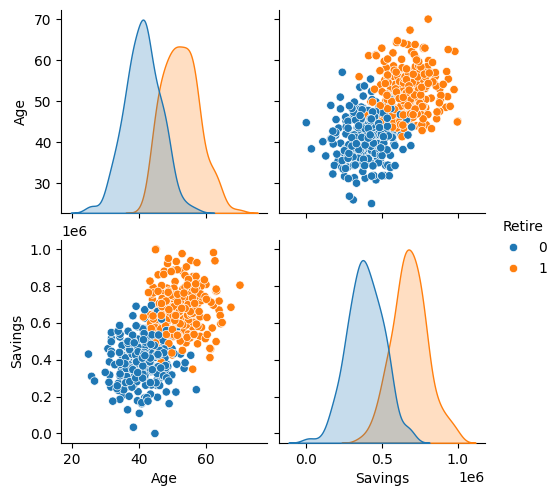

In [14]:
sns.pairplot(dataset,hue='Retire',vars=['Age','Savings'])

### Age and savings have a linear relation seperable and show linear relationship
- savings or retire has well as age have a higher range then
- people who donot retire and
- savings will be higher range than people who donot retire and
- increase in age and savings are more of customers undergo retirement 

In [16]:
#checking the balance of data
dataset.Retire.value_counts()

Retire
0    250
1    250
Name: count, dtype: int64

<Axes: xlabel='Retire', ylabel='count'>

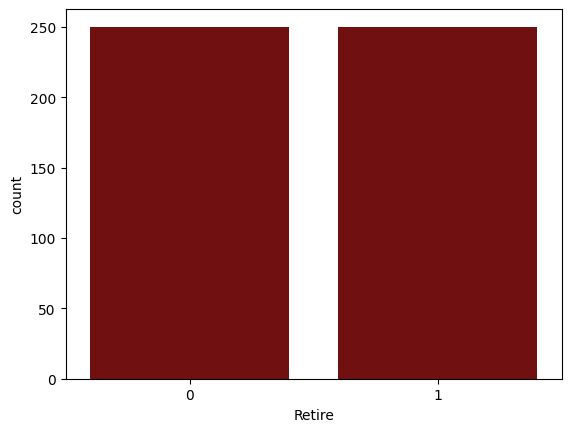

In [17]:
sns.countplot(x='Retire',data=dataset,color='maroon')

### splitting the data into feature set 

In [19]:
X=dataset.drop('Retire',axis=1)

In [20]:
y=dataset['Retire']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=50)

In [23]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(X_train,y_train)

SVC()

In [24]:
pred1=svm_model.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report
cm= confusion_matrix(y_test,pred1)
print(cm)
print(classification_report(y_test,pred1))

[[58  8]
 [ 5 54]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        66
           1       0.87      0.92      0.89        59

    accuracy                           0.90       125
   macro avg       0.90      0.90      0.90       125
weighted avg       0.90      0.90      0.90       125



In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc=StandardScaler()

In [28]:
X_train1= sc.fit_transform(X_train)

In [29]:
X_test1=sc.fit_transform(X_test)

In [30]:
X_train1

array([[ 1.26394148e+00,  7.44578584e-01],
       [ 3.64238413e-01, -3.93161987e-01],
       [-9.35994008e-01, -6.74571207e-01],
       [ 1.65298445e+00,  1.45506343e+00],
       [-3.81395382e-01,  1.17843718e+00],
       [-7.08522531e-01, -8.35675217e-01],
       [ 1.28451239e+00,  1.52873263e+00],
       [-1.40636680e+00, -6.56406789e-01],
       [-9.72594824e-01, -1.34192162e+00],
       [-8.09682004e-01, -7.03020927e-01],
       [-6.04238001e-02,  1.80057934e-01],
       [ 6.06460922e-01, -2.37330152e-02],
       [ 8.09709694e-01,  8.54859933e-01],
       [-3.61018495e-01,  5.48758558e-01],
       [-2.80940354e+00, -5.47881607e-01],
       [-7.53893315e-01, -1.23875712e+00],
       [-6.12851309e-01, -9.90838798e-01],
       [ 5.75257584e-02, -4.01719357e-01],
       [-2.31415279e-01, -5.80805530e-01],
       [ 9.42689545e-02, -6.60548480e-01],
       [-2.85752721e-01, -2.83279664e+00],
       [-8.33455673e-01, -7.26135858e-01],
       [-1.51500174e-01, -2.40425288e-01],
       [-1.

In [31]:
from sklearn.svm import SVC
model=SVC()

In [32]:
model.fit(X_train1,y_train)

SVC()

In [33]:
pred2=model.predict(X_test1)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,pred2)
print(cm)
print(classification_report(y_test,pred2))

[[62  4]
 [ 3 56]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        66
           1       0.93      0.95      0.94        59

    accuracy                           0.94       125
   macro avg       0.94      0.94      0.94       125
weighted avg       0.94      0.94      0.94       125

